# Part 1 - Spatial Clustering of Spills

## 1.1 - Import libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('oil_spills.csv')

## 1.2 - Determine number of clusters

In [35]:
# Selecting coordinate features
coordinates_with_info = data[['Latitude', 'Longitude', 'State', 'P_Type']]

In [ ]:
print(coordinates_with_info)

In [37]:
kmeans = KMeans(n_clusters=4, n_init=10)

In [ ]:
kmeans.fit(coordinates_with_info[['Latitude', 'Longitude']])

In [39]:
cluster_labels = kmeans.labels_

In [40]:
data['Cluster'] = cluster_labels

## 1.3 - Visualize result

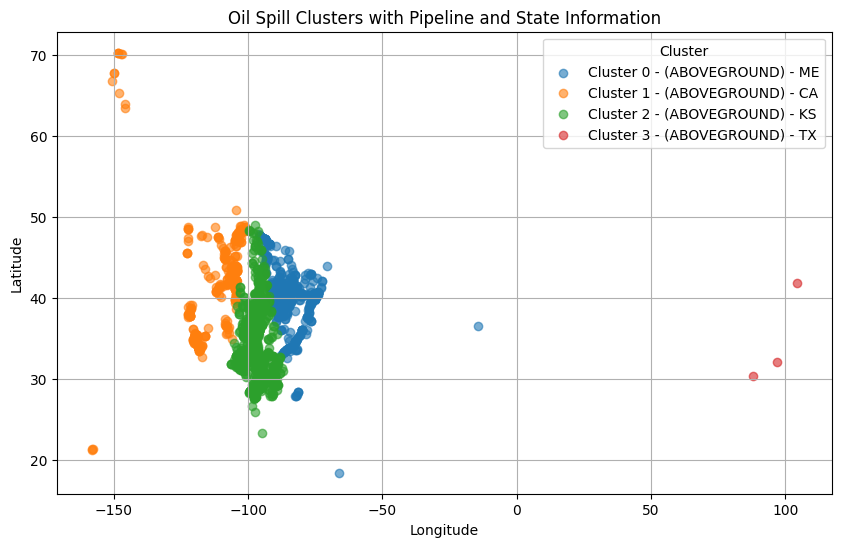

In [41]:
# Visualize the clusters with pipeline location, pipeline type, and state information
plt.figure(figsize=(10, 6))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    # Extract unique pipeline location, type, and state for this cluster
    p_type = cluster_data['P_Type'].unique()[0]
    state = cluster_data['State'].unique()[0]
    # Plot the cluster and include pipeline location, type, and state in the label
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster} - ({p_type}) - {state}', alpha=0.6)

# Add legend with pipeline location, type, and state
plt.legend(title='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Oil Spill Clusters with Pipeline and State Information')
plt.grid(True)
plt.show()

## 1.4 - Evaluate model

In [46]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

# Select all features for clustering
features = pd.get_dummies(data[['Latitude', 'Longitude', 'State', 'P_Type']])

# Initialize K-means
kmeans = KMeans(n_clusters=4, n_init=10)

# Fit K-means to the data
kmeans.fit(features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Calculate scores
silhouette_avg = silhouette_score(features, cluster_labels)
print("Silhouette Score:", silhouette_avg)
davies_bouldin = davies_bouldin_score(features, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)
calinski_harabasz = calinski_harabasz_score(features, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Inertia:", kmeans.inertia_)


Silhouette Score: 0.49832848637333427
Davies-Bouldin Index: 0.6137532037813581
Calinski-Harabasz Index: 2296.5258676329995
Inertia: 149319.92614824662


# Part 2 - Prediction

## 2.1 - Display features and index

In [ ]:
import pandas as pd

df = pd.read_csv('oil_spills.csv')

# Display the first few rows of the DataFrame
print(df.head())

In [ ]:
# Display the features and their data types
for idx, column in enumerate(df.columns):
    print(f"Index: {idx}, Feature: {column}, Data Type: {df.dtypes[idx]}")

## 2.2 - Define the feature columns and target column

In [ ]:
feature_columns = ['P_Type', 'L_Type', 'Cause Category', 'Cause Subcategory',
                   'Latitude', 'Longitude', 'Unintentional Release (Barrels)',
                   'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
                   'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion',
                   'Pipeline Shutdown', 'Property Damage Costs', 'Lost Commodity Costs',
                   'Public/Private Property Damage Costs', 'Emergency Response Costs',
                   'Environmental Remediation Costs', 'Other Costs']

target_column = 'All Costs'

# Extract features and target variable
X = df[feature_columns]
y = df[target_column]

# Check for missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum().sum())

# Drop rows with missing values if any
X = X.dropna()
y = y[X.index]  # Align y with X after dropping rows with missing values

print("Shape of X after removing missing values:", X.shape)
print("Shape of y after removing missing values:", y.shape)


## 2.3 - Encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify the types of features
categorical_features = ['P_Type', 'L_Type', 'Cause Category', 'Cause Subcategory']
binary_features = ['Liquid Ignition', 'Liquid Explosion', 'Pipeline Shutdown']
numerical_features = ['Latitude', 'Longitude', 'Unintentional Release (Barrels)',
                      'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
                      'Net Loss (Barrels)', 'Property Damage Costs',
                      'Lost Commodity Costs', 'Public/Private Property Damage Costs',
                      'Emergency Response Costs', 'Environmental Remediation Costs',
                      'Other Costs']

# Preprocessing pipelines for the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('bin', OneHotEncoder(drop='if_binary'), binary_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Fit and transform the data using the preprocessing pipeline
X_transformed = preprocessor.fit_transform(X)

# Check the transformed data
print("Transformed feature shape:", X_transformed.shape)


## 2.4 - Split training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


## 2.5 - Train the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Print the trained model
print(rf_model)

## 2.6 - Perform initial model evaluation

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 61003839426960.305
R^2 Score: 0.34684584216685765


### Results were unsatisfactory, proceed to try other models

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best MSE score found: ", -grid_search.best_score_)

# Train the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, y_pred_best_rf)
best_rf_r2 = r2_score(y_test, y_pred_best_rf)

print("Best Random Forest Model - Mean Squared Error:", best_rf_mse)
print("Best Random Forest Model - R^2 Score:", best_rf_r2)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Model - Mean Squared Error:", gb_mse)
print("Gradient Boosting Model - R^2 Score:", gb_r2)


In [ ]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# Evaluate the Neural Network model
y_pred_nn = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)

print("Neural Network Model - Mean Squared Error:", nn_mse)
print("Neural Network Model - R^2 Score:", nn_r2)


## 2.7 - Select best trained and evaluated model

In [85]:
# Print summary of results
print("Random Forest Model - Mean Squared Error:", best_rf_mse)
print("Random Forest Model - R^2 Score:", best_rf_r2)

print("Gradient Boosting Model - Mean Squared Error:", gb_mse)
print("Gradient Boosting Model - R^2 Score:", gb_r2)

print("Neural Network Model - Mean Squared Error:", nn_mse)
print("Neural Network Model - R^2 Score:", nn_r2)


Random Forest Model - Mean Squared Error: 60176967501855.19
Random Forest Model - R^2 Score: 0.3556989707723863
Gradient Boosting Model - Mean Squared Error: 50353792187182.9
Gradient Boosting Model - R^2 Score: 0.4608734624137527
Neural Network Model - Mean Squared Error: 79872225999077.86
Neural Network Model - R^2 Score: 0.14482634213297774


## 2.8 - Feature importance

In [ ]:
# Get the feature names after transformation
transformed_feature_names = preprocessor.get_feature_names_out()

# Get feature importances from the Gradient Boosting model
feature_importances = gb_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Generate predictions on the test set
y_pred_gb_test = gb_model.predict(X_test)

# Evaluate the model's performance on the test set
gb_mse_test = mean_squared_error(y_test, y_pred_gb_test)
gb_r2_test = r2_score(y_test, y_pred_gb_test)

# Print the evaluation metrics
print("Gradient Boosting Model Performance on Test Set:")
print("Mean Squared Error:", gb_mse_test)
print("R^2 Score:", gb_r2_test)


# Part 3 - Optimization

## 3.1 - Import libraries

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
!pip install shap
import shap

In [ ]:
# Load the dataset
df2 = pd.read_csv("oil_spills.csv")

# Display the first few rows of the dataset
print(df2.head())


## 3.2 - Train the model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the preprocessed data
gb_model.fit(preprocessed_data, y)

## 3.3 - Make predictions

In [ ]:
# Generate predictions for the total cost
predictions = gb_model.predict(preprocessed_data)

# Print the predictions to see the output
print(predictions)
